In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 10
plt.rcParams['axes.labelsize'] = 20

In [2]:
import numpy as np

from DDAS import MakeReal
from AntennaSelection import generateOASdata 

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data_prep_pipeline = Pipeline([
    ('toReal', MakeReal(RealPart = False, ImaginaryPart=False, magnitude = True, Phase = True)),
    ('stdScaler', StandardScaler()),
])

In [35]:
Nt = 4
Nr = 4

X,y = generateOASdata(100000,nt=Nt,nr=Nr)
X_test,y_test = generateOASdata(1000,nt = Nt,nr = Nr)

In [36]:
X_train = data_prep_pipeline.fit_transform(X)
X_test = data_prep_pipeline.transform(X_test)

(100000, 32)
(100000, 64)
(1000, 32)


In [5]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
enc.fit(y.reshape(-1,1))
print(enc.n_values_)
y_train = enc.transform(y.reshape(-1,1))
y_test = enc.transform(y_test.reshape(-1,1))

[4]


In [6]:
print(y[0:5])
print(y_train.shape)
print(y_test.shape)
print(y_train)
print(y_test)

[3. 1. 0. 1. 1.]
(10000, 4)
(1000, 4)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

forest_clf = RandomForestClassifier()
#forest_clf.fit(X_train, y_train)
cross_val_score(forest_clf, X_train, y, cv=2,scoring = "accuracy")


array([0.46410718, 0.47229446])

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
cross_val_score(sgd_clf, X_train,y,cv=2,scoring = "accuracy")

/usr/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([0.74765047, 0.74654931])

In [9]:
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(forest_clf, X_train, y,cv=2)


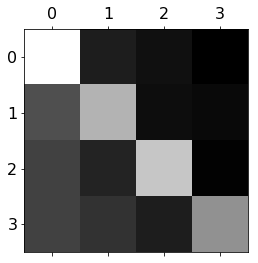

In [10]:
conf_mx = confusion_matrix(y, y_train_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [11]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
    ('svm_clf', SVC(kernel="rbf", gamma=5,C=0.001))
])

rbf_kernel_svm_clf.fit(X_train,y)

Pipeline(memory=None,
     steps=[('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [12]:
y_train_pred = cross_val_predict(rbf_kernel_svm_clf, X_train, y,cv=2)


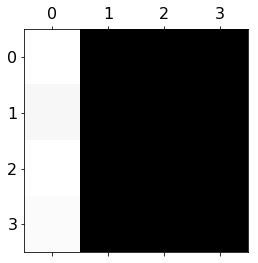

In [13]:
conf_mx = confusion_matrix(y, y_train_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [14]:
cross_val_score(rbf_kernel_svm_clf, X_train, y,cv=2,scoring = "accuracy")

array([0.25354929, 0.25345069])

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

In [16]:
rf_clf = RandomForestClassifier()
sgd_clf = SGDClassifier()
knearest_clf = KNeighborsClassifier(n_neighbors=201)

In [17]:
rf_scores = cross_val_score(rf_clf, X_train, y,cv=3 ,scoring="accuracy")
print(rf_scores)

[0.46626687 0.47614761 0.47268908]


In [18]:
sgd_scores = cross_val_score(sgd_clf, X_train, y,cv=3 ,scoring="accuracy")
print(sgd_scores)

[0.76221889 0.75667567 0.7530012 ]


/usr/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/lib64/python3.6/site-packages/sklearn/linea

In [19]:
knearest_scores = cross_val_score(knearest_clf, X_train, y, cv=3, scoring="accuracy")
print(knearest_scores)

[0.68245877 0.68286829 0.67647059]


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [21]:
gp_clf = GaussianProcessClassifier(1.0 * RBF(1.0), n_jobs=-1)
mlpc_clf = MLPClassifier(alpha=1)

In [22]:
gp_scores = cross_val_score(gp_clf, X_train[0:1000,:], y[0:1000], cv=3, scoring="accuracy")
print(gp_scores)

[0.26567164 0.26426426 0.26506024]


In [37]:
mlpc_scores = cross_val_score(mlpc_clf, X_train, y, cv=3,scoring="accuracy")
print(mlpc_scores)

[0.9049019  0.90639906 0.90465905]


In [38]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf,X_train, y, cv=3, scoring="accuracy")
print(svc_scores)

[0.89941201 0.900249   0.90336903]
